In [ ]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
nx = 30
dx = 1. / nx
x_spac = np.linspace(0, 3, nx)
# x_space = (x_spac - (np.mean(x_spac)))/(np.std(x_spac))
x_space = normalize(x_spac)
# x_space =standardize(x_spac)


In [ ]:
x_space

array([-1.67524673, -1.55971247, -1.44417822, -1.32864396, -1.2131097 ,
       -1.09757545, -0.98204119, -0.86650693, -0.75097267, -0.63543842,
       -0.51990416, -0.4043699 , -0.28883564, -0.17330139, -0.05776713,
        0.05776713,  0.17330139,  0.28883564,  0.4043699 ,  0.51990416,
        0.63543842,  0.75097267,  0.86650693,  0.98204119,  1.09757545,
        1.2131097 ,  1.32864396,  1.44417822,  1.55971247,  1.67524673])

In [ ]:
def normalize(A):
  return (A - np.min(A))/(np.max(A)-np.min(A))
def standardize(A):
  return (A-(np.mean(A)))/(np.std(A))



In [ ]:
import math
def analytic_solution_psi1(x):
    return  np.sin(x)
def analytic_solution_psi2(x):
    return  1+ (x**2)



In [ ]:

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W,b, x):
    a1 = sigmoid(np.dot(x, W[0])+b[0])
    normalize(a1)
    a2 = np.dot(a1, W[1])+b[1]
    return a2
    # return normalize(a2)


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def d_neural_network_dx(W,b, x):
    return np.dot(np.dot(W[1].T, W[0].T), sigmoid_grad(x))


def psy1_trial(x, net_out):
    return  (x*net_out)

def psy2_trial(x, net_out):
    return  1+(x*net_out)



# def psy1(x):
#     return np.cos(x)+(psy1_trial(x,net_out)**2)+(psy2_trial(x,net_out))-(1+(x**2)+((np.sin(x))**2))
# def psy2(x):
#     return (2*x)-((1+(x**2))*np.sin(x))+(psy1_trial(x,net_out)*psy2_trial(x,net_out))


def loss_function(W,b, x):
    loss_sum = 0

    for xi in x:

        net_out1 = (neural_network(W,b,xi))[0][0]
        net_out2 = (neural_network(W,b,xi))[0][1]
        t1 = psy1_trial(xi,net_out1)
        t2 = psy2_trial(xi,net_out2)
        d_net_out1 = (d_neural_network_dx(W,b, xi))[0][0]
        d_net_out2 = (d_neural_network_dx(W,b, xi))[1][0]
        d_psy_t1 = net_out1 + xi * d_net_out1
        d_psy_t2 = net_out2 + xi * d_net_out2
        psy1= np.cos(xi)+(t1**2)+(t2)-(1+(xi**2)+((np.sin(xi))**2))
        psy2= (2*xi)-((1+(xi**2))*np.sin(xi))+(t1*t2)
        func1 = psy1
        func2 = psy2
        err_sqr = ((((d_psy_t1) - (func1))**2 )+((d_psy_t2) - (func2))**2)**(1/2)

        loss_sum += err_sqr

    return (loss_sum)



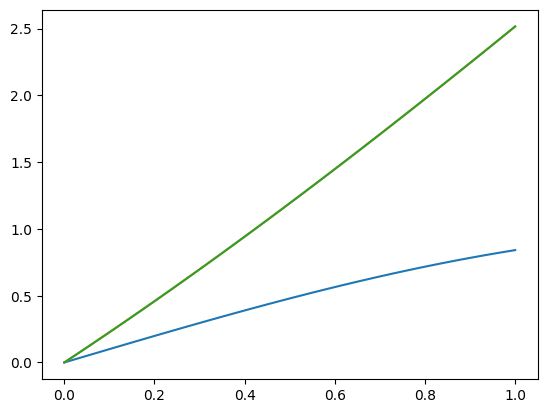

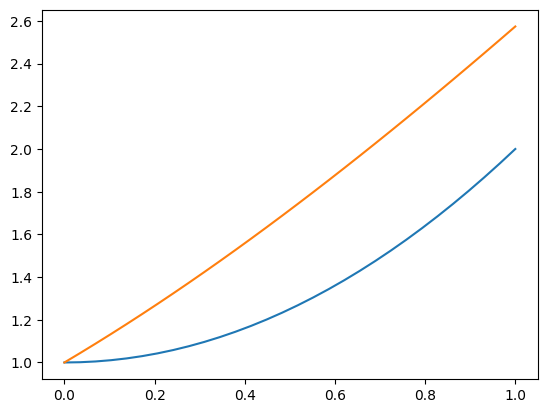

loss 64.90446026570959


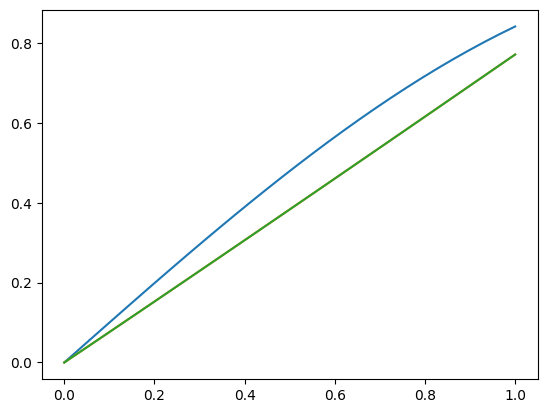

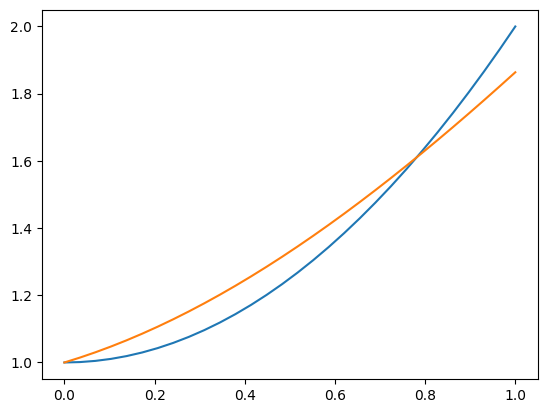

loss 9.243098771014706


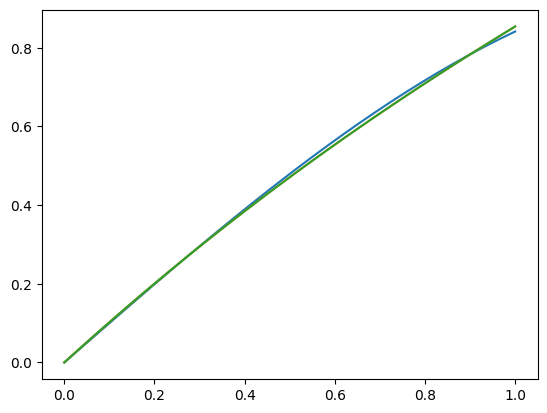

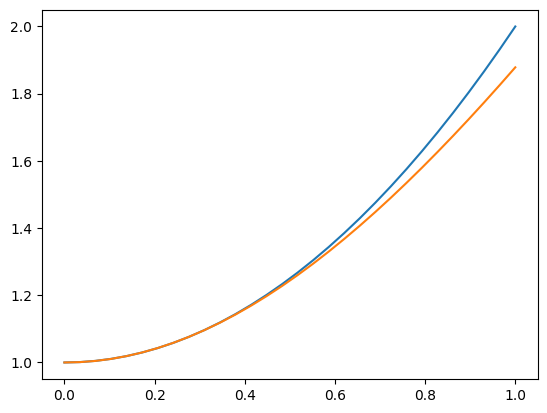

loss 2.2385269694192482


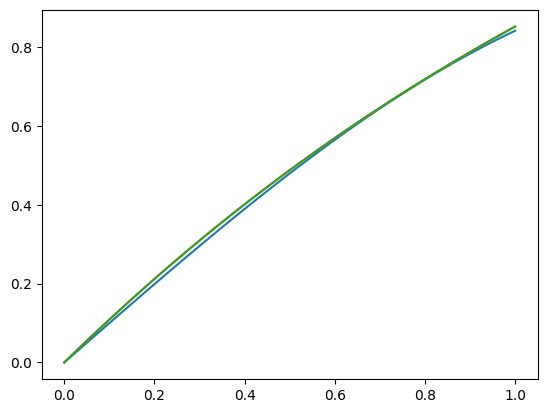

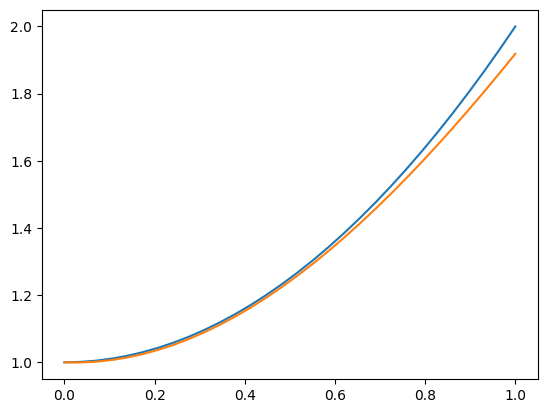

loss 1.6791141697350085


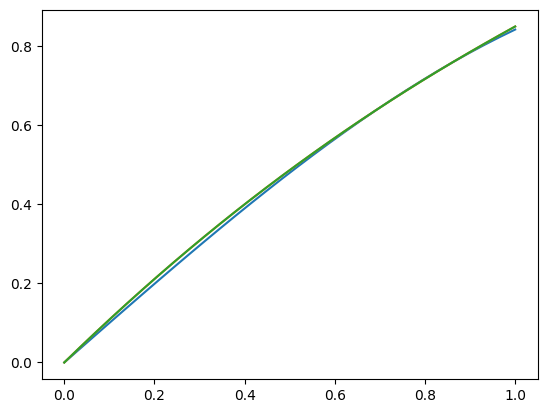

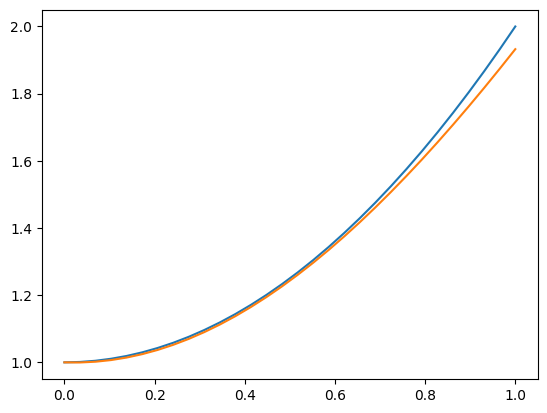

loss 1.6273060503894086


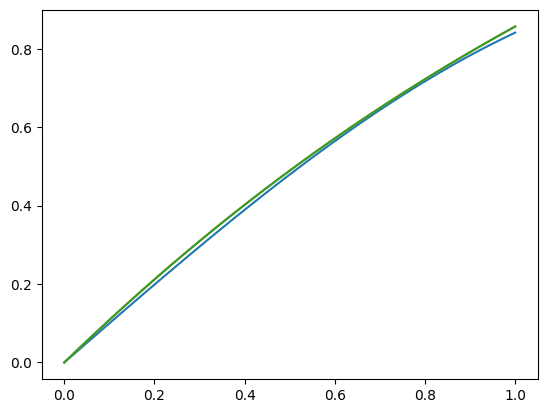

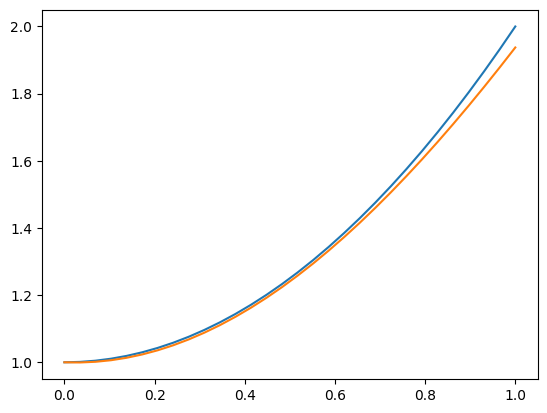

loss 1.6229245133012753


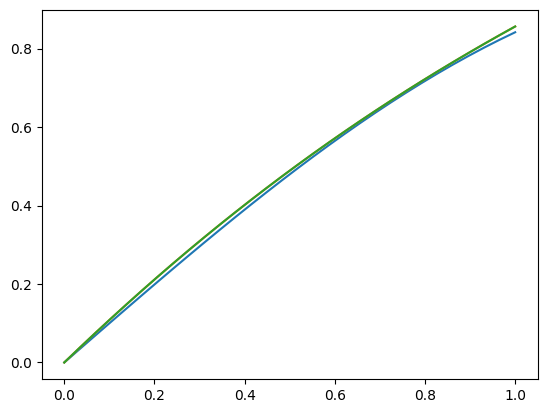

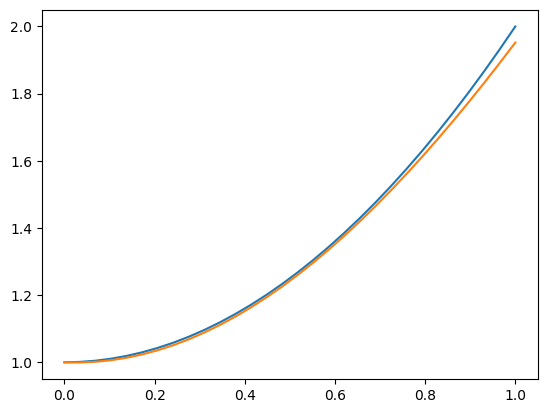

loss 1.562333335354685


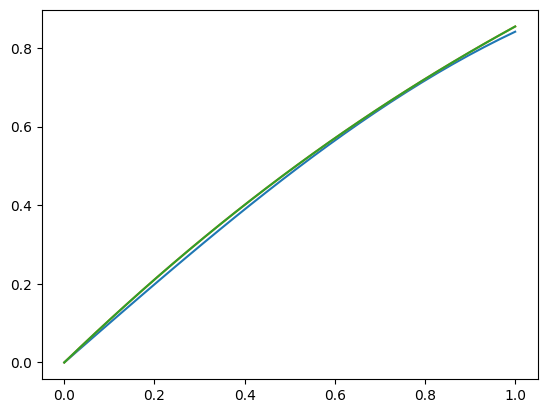

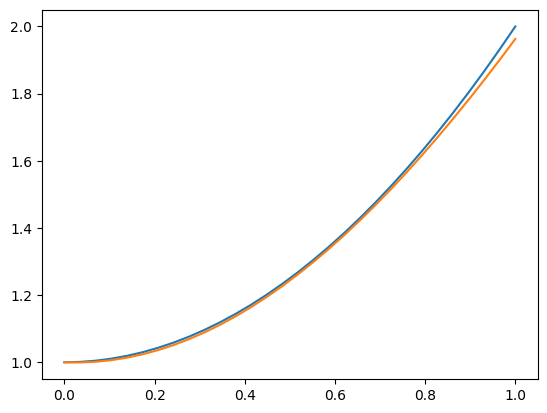

loss 1.519518014465055


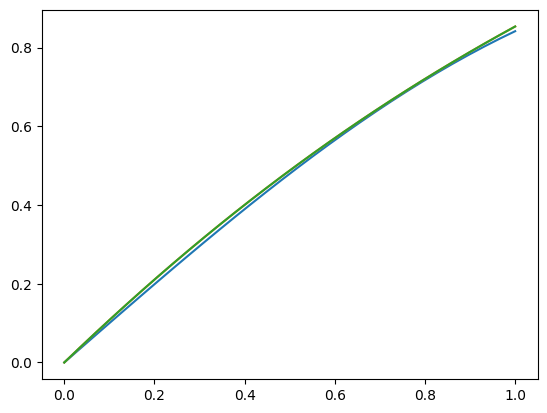

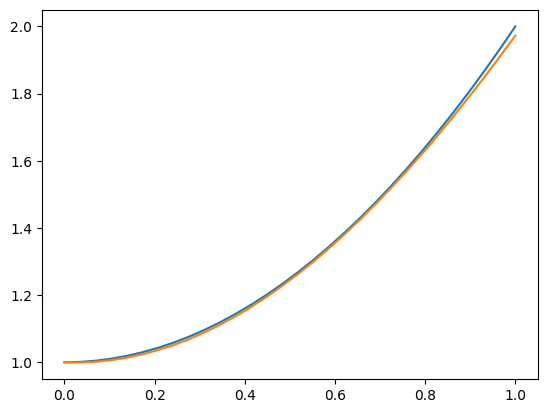

loss 1.4799708070210507


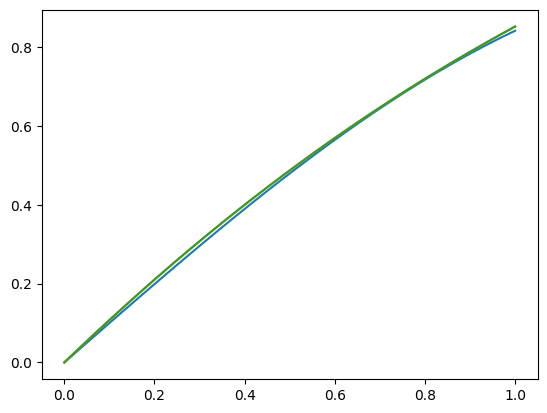

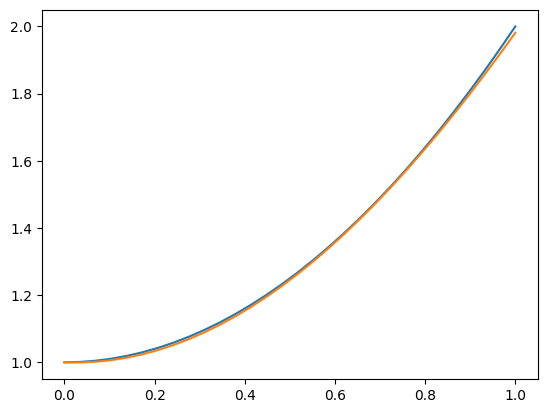

loss 1.4434574462489125


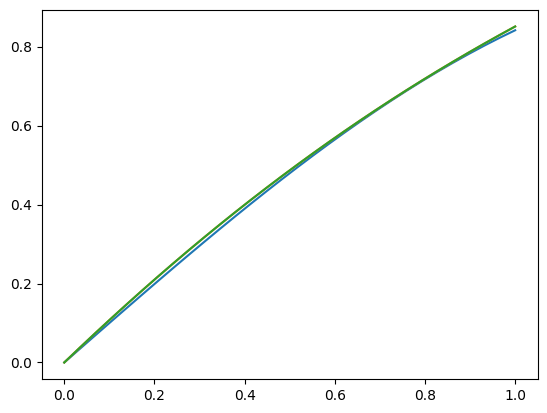

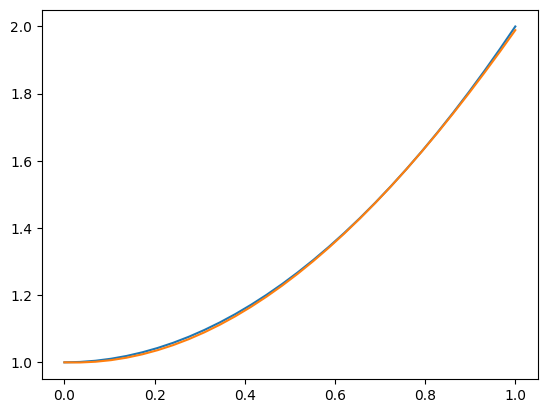

loss 1.409734303957786


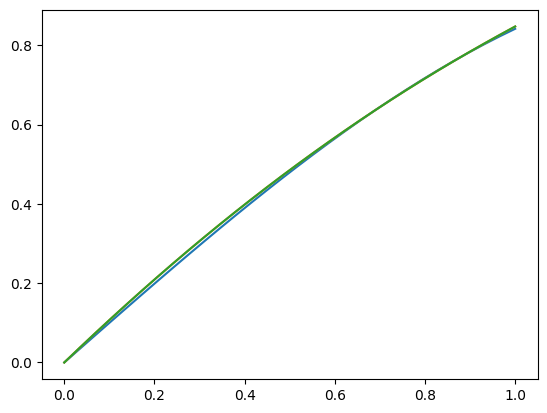

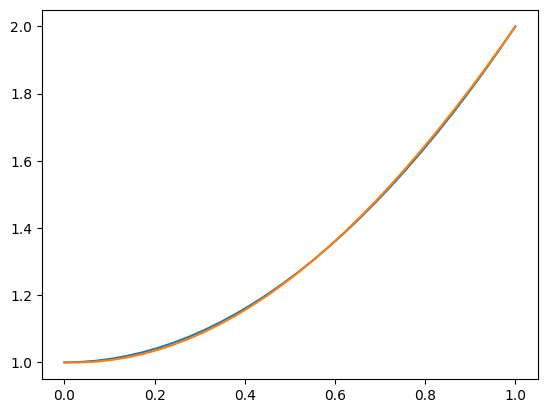

loss 1.3654078741196047


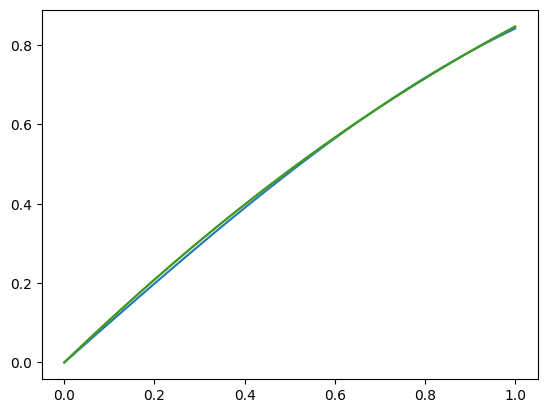

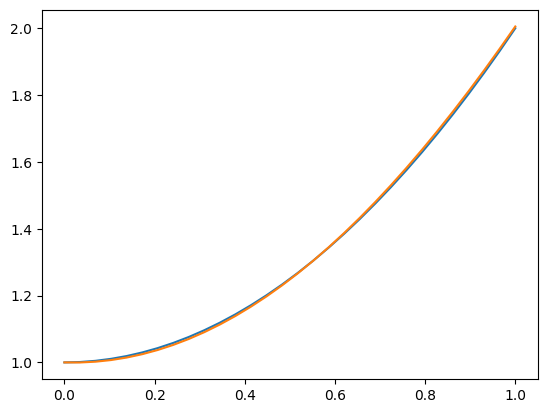

loss 1.338700454239448


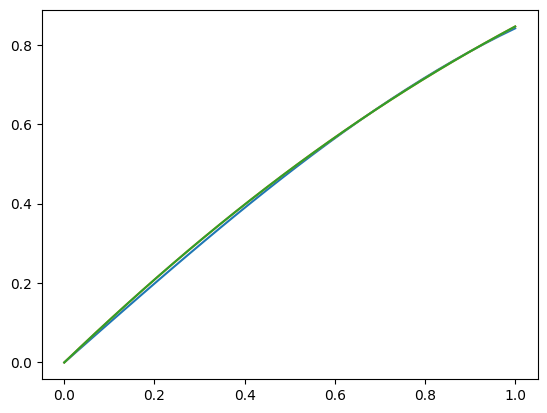

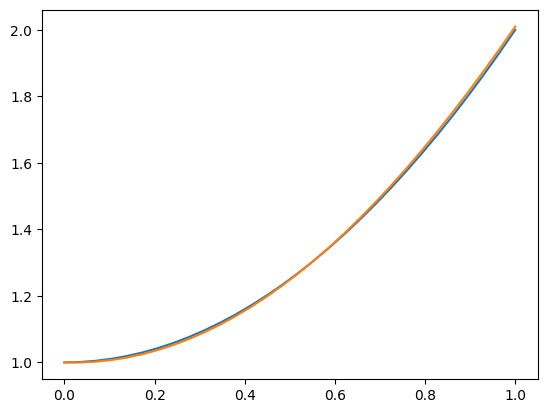

loss 1.3144062784880046


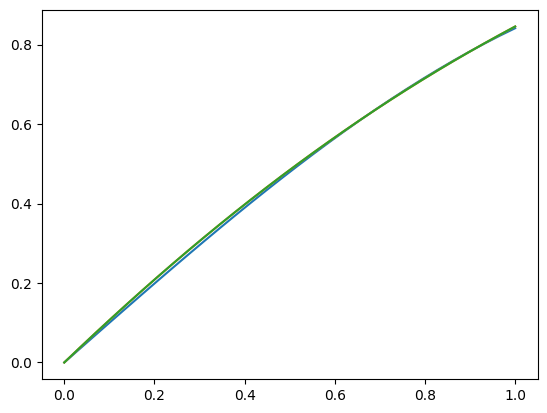

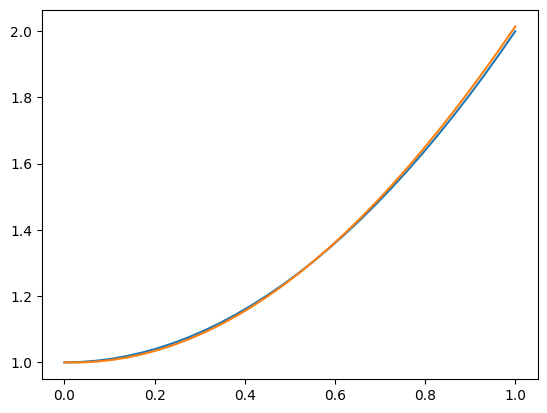

loss 1.2917285827379494


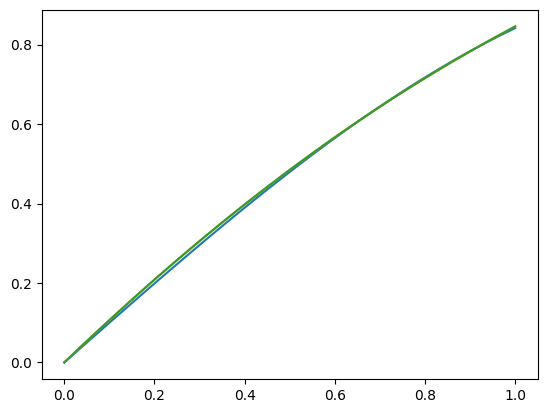

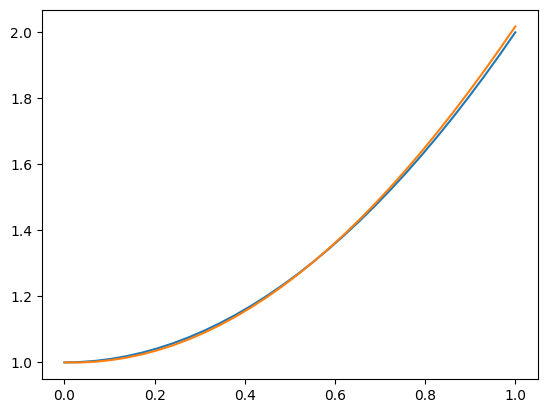

loss 1.270456229308658


KeyboardInterrupt: ignored

In [ ]:
import autograd.numpy as np
from autograd import grad
import numpy
w1=np.random.randn(1, 4)
w2=np.random.randn(4, 2)
b1=np.random.randn(4)
b2=np.random.randn(2)
W = [normalize(w1) , normalize(w2)]
b = [normalize(b1) , normalize(b2)]

lmb = 0.001



for i in range(10000):
          loss_grad_W = grad(loss_function, argnum=0)(W, b, x_space)
          loss_grad_B = grad(loss_function, argnum=1)(W, b, x_space)

          W[0] = W[0] - lmb * loss_grad_W[0]
          W[1] = W[1] - lmb * loss_grad_W[1]


          b[0] = b[0] - lmb * loss_grad_B[0]
          b[1] = b[1] - lmb * loss_grad_B[1]





          if(i%200 == 0):

                psi1 = analytic_solution_psi1(x_space)
                psi2 = analytic_solution_psi2(x_space)
                res1 = [ xi * (neural_network(W,b, xi))[0][0] for xi in x_space]
                res2 = [1 + xi * (neural_network(W,b, xi))[0][1] for xi in x_space]



                plt.figure()

                plt.plot(x_space, psi1)
                plt.plot(x_space, res1)
                plt.plot(x_space, res1)
                plt.show()
                plt.figure()
                plt.plot(x_space, psi2)
                plt.plot(x_space, res2)
                plt.show()

                print ('loss',loss_function(W,b,x_space))

